In [1]:
# example of using the upsampling layer
from numpy import asarray
from keras.models import Sequential
from keras.layers import UpSampling2D
# define input data
X = asarray([[1, 2],
			 [3, 4]])
# show input data for context
print(X)
# reshape input data into one sample a sample with a channel
X = X.reshape((1, 2, 2, 1))
# define model
model = Sequential()
model.add(UpSampling2D(input_shape=(2, 2, 1)))
# summarize the model
model.summary()
# make a prediction with the model
yhat = model.predict(X)
# reshape output to remove channel to make printing easier
yhat = yhat.reshape((4, 4))
# summarize output
print(yhat)

[[1 2]
 [3 4]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) (None, 4, 4, 1)           0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [2]:

# example of using upsampling in a simple generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import UpSampling2D
from keras.layers import Conv2D
# define model
model = Sequential()
# define input shape, output enough activations for for 128 5x5 image
model.add(Dense(128 * 5 * 5, input_dim=100))
# reshape vector of activations into 128 feature maps with 5x5
model.add(Reshape((5, 5, 128)))
# double input from 128 5x5 to 1 10x10 feature map
model.add(UpSampling2D())
# fill in detail in the upsampled feature maps and output a single image
model.add(Conv2D(1, (3,3), padding='same'))
# summarize model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3200)              323200    
_________________________________________________________________
reshape (Reshape)            (None, 5, 5, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 10, 10, 1)         1153      
Total params: 324,353
Trainable params: 324,353
Non-trainable params: 0
_________________________________________________________________


with conv2dtranspose

In [3]:
# example of using the transpose convolutional layer
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2DTranspose
# define input data
X = asarray([[1, 2],
			 [3, 4]])
# show input data for context
print(X)
# reshape input data into one sample a sample with a channel
X = X.reshape((1, 2, 2, 1))
# define model
model = Sequential()
model.add(Conv2DTranspose(1, (1,1), strides=(2,2), input_shape=(2, 2, 1)))
# summarize the model
model.summary()
# define weights that they do nothing
weights = [asarray([[[[1]]]]), asarray([0])]
# store the weights in the model
model.set_weights(weights)
# make a prediction with the model
yhat = model.predict(X)
# reshape output to remove channel to make printing easier
yhat = yhat.reshape((4, 4))
# summarize output
print(yhat)

[[1 2]
 [3 4]]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 4, 4, 1)           2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [3. 0. 4. 0.]
 [0. 0. 0. 0.]]


In [4]:
# example of using transpose conv in a simple generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import Conv2D
# define model
model = Sequential()
# define input shape, output enough activations for for 128 5x5 image
model.add(Dense(128 * 5 * 5, input_dim=100))
# reshape vector of activations into 128 feature maps with 5x5
model.add(Reshape((5, 5, 128)))
# double input from 128 5x5 to 1 10x10 feature map
model.add(Conv2DTranspose(1, (3,3), strides=(2,2), padding='same'))
# summarize model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3200)              323200    
_________________________________________________________________
reshape_1 (Reshape)          (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 10, 10, 1)         1153      
Total params: 324,353
Trainable params: 324,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [6]:
encoder = keras.Model(input_img, encoded)

In [7]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [8]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [11]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.3824 - val_loss: 0.1878
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1773 - val_loss: 0.1529
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1487 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1318 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1197 - val_loss: 0.1122
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1114 - val_loss: 0.1062
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1060 - val_loss: 0.1021
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1024 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0996 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0977 - val_loss: 0.0955

In [12]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

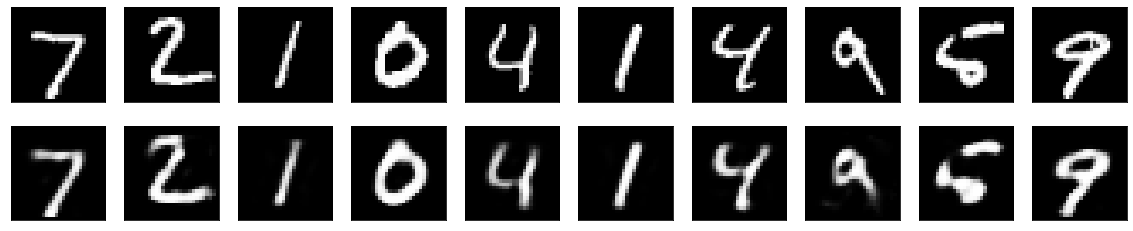

In [13]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [15]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [16]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3458 - val_loss: 0.1715
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1629 - val_loss: 0.1405
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1375 - val_loss: 0.1249
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1242 - val_loss: 0.1174
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1179 - val_loss: 0.1127
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1132 - val_loss: 0.1088
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1093 - val_loss: 0.1055
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1064 - val_loss: 0.1042
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1039 - val_loss: 0.1007
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1018 - val_lo

convolutional encoder

In [17]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [19]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


Epoch 1/50
469/469 [==============================] - 4s 6ms/step - loss: 0.3073 - val_loss: 0.1571
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1521 - val_loss: 0.1366
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1355 - val_loss: 0.1277
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1265 - val_loss: 0.1209
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1212 - val_loss: 0.1173
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1179 - val_loss: 0.1144
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1150 - val_loss: 0.1123
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1130 - val_loss: 0.1103
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1110 - val_loss: 0.1089
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1097 - val_loss: 0.1072

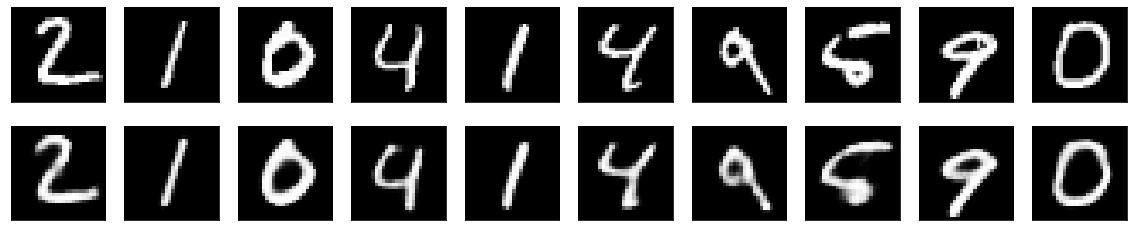

In [20]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

noisy digits visualization

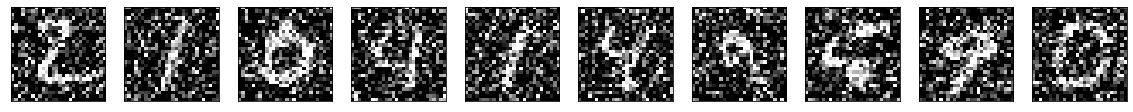

In [22]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [24]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.2554 - val_loss: 0.1217
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1162 - val_loss: 0.1094
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1092 - val_loss: 0.1054
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1056 - val_loss: 0.1034
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1034 - val_loss: 0.1015
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1018 - val_loss: 0.1003
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1008 - val_loss: 0.0997
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0998 - val_loss: 0.0989
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0992 - val_loss: 0.0980
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0984 - val_lo

variational autoencoder

In [25]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [26]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [27]:
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [28]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 222.4261 - val_loss: 169.1261
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 168.2492 - val_loss: 164.7908
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 164.1830 - val_loss: 161.3217
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 161.1398 - val_loss: 159.2079
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 158.8383 - val_loss: 157.6746
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 157.4263 - val_loss: 156.3134
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 156.1891 - val_loss: 155.4207
Epoch 8/100
1875/1875 [==============================] - 5s 2ms/step - loss: 154.8387 - val_loss: 154.5858
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 154.1567 - val_loss: 153.9425
Epoch 10/100
1875/1875 [=============

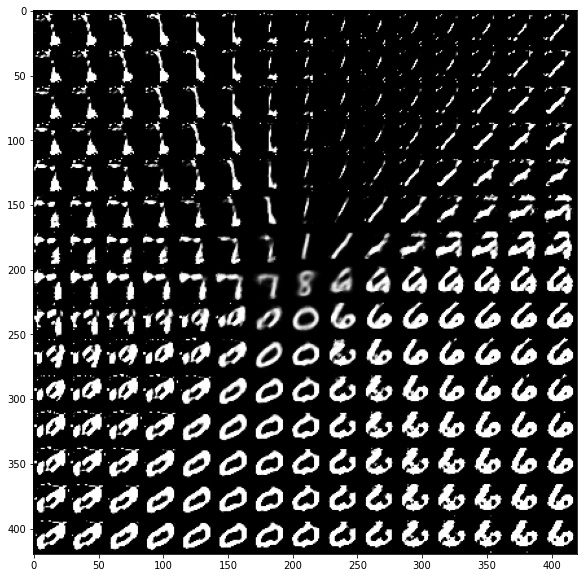

In [29]:
# Display a 2D manifold of the digits

import numpy as np
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()